In [1]:
import numpy as np
import pandas as pd

In [2]:
train_file=r'C:\Python\kaggle\@ON-工业AI\data\训练.xlsx'
testa_file=r'C:\Python\kaggle\@ON-工业AI\data\测试A.xlsx'
testb_file=r'C:\Python\kaggle\@ON-工业AI\data\测试B.xlsx'
train=pd.read_excel(train_file)
test_a=pd.read_excel(testa_file)
test_b=pd.read_excel(testb_file)

In [3]:
raw_feature=train.columns

In [31]:
raw_feature

Index(['ID', 'TOOL_ID', '210X1', '210X2', '210X3', '210X4', '210X5', '210X6',
       '210X7', '210X8',
       ...
       '750X1444', '750X1445', '750X1446', '750X1447', '750X1448', '750X1449',
       '750X1450', '750X1451', '750X1452', 'Y'],
      dtype='object', length=8029)

In [4]:
raw_feature_type=train.dtypes

In [16]:
pd.value_counts(raw_feature_type.values)

float64    6279
int64      1739
object       11
dtype: int64

In [17]:
train.head()

,ID,TOOL_ID,210X1,210X2,210X3,210X4,210X5,210X6,210X7,210X8,...,750X1444,750X1445,750X1446,750X1447,750X1448,750X1449,750X1450,750X1451,750X1452,Y
0,ID001,N,102.05,0.465,0.27,1.430,67.45,4.620,-0.54,-1.05,...,0.00072,0.00072,25.7,0.00072,0.00072,25.7,0.00072,0.00072,2.400000e+12,2.945079
1,ID002,M,100.95,0.805,0.22,3.477,62.08,3.412,-2.12,1.02,...,0.00072,0.00072,25.5,0.00072,0.00072,25.5,0.00072,0.00072,2.400000e+12,2.955092
2,ID003,L,98.56,0.555,0.24,1.172,56.70,3.080,-2.25,0.88,...,0.00064,0.00064,25.2,0.00064,0.00064,25.2,0.00064,0.00064,2.400000e+12,2.741264
3,ID004,M,100.35,0.901,0.22,3.631,62.25,3.949,-1.98,0.82,...,0.00072,0.00072,26.4,0.00072,0.00072,26.4,0.00072,0.00072,2.400000e+12,2.799336
4,ID005,M,100.25,0.854,0.23,3.429,61.42,3.630,-1.89,1.02,...,0.00072,0.00072,26.4,0.00072,0.00072,26.4,0.00072,0.00072,2.400000e+12,2.692093


In [18]:
train_label=train['Y']

In [28]:
#画图预备动作
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
import seaborn as sns

In [22]:
#观察样本在连续变量上分布的函数，确定样本平衡度的问题
def exp_banlance(df,target):
    plt.figure(figsize=(8,6))
    plt.scatter(range(df.shape[0]), np.sort(df[target].values))
    plt.show()

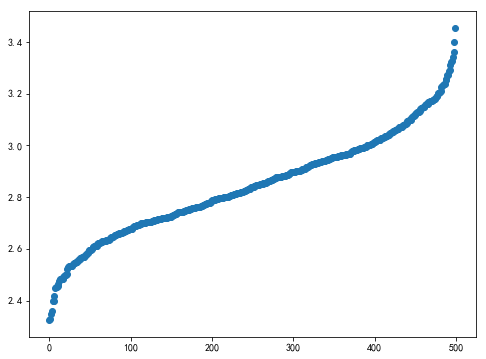

In [23]:
exp_banlance(train,'Y')

In [29]:
def exp_distribution(df,target,bins=20):
    plt.figure(figsize=(12,8))
    sns.distplot(df[target].values, bins=bins, kde=True)

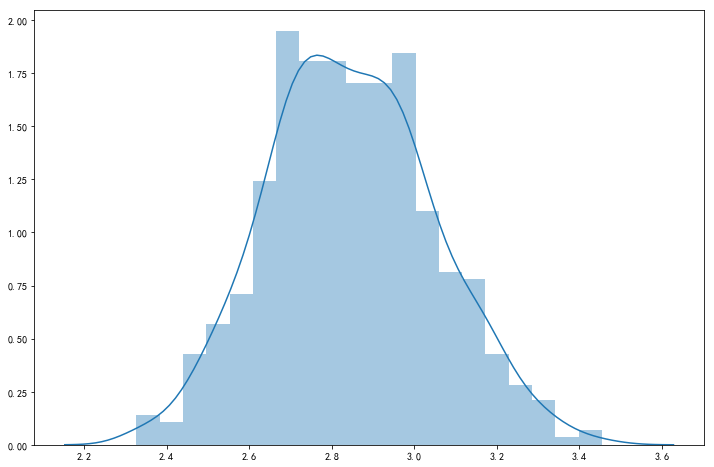

In [30]:
exp_distribution(train,'Y')

In [36]:
def get_feature_category(data):
    feature_names=data.columns
    feature_category=pd.Series(np.zeros(len(feature_names)),index=feature_names)
    for i in feature_names:
        feature_set=data[i].unique()
        feature_set_lenth=len(feature_set)
        feature_category[i]=feature_set_lenth
    return feature_category

In [132]:
feature_category=get_feature_category(train)
feature_category_stat=pd.value_counts(feature_category.values).sort_values()
feature_category_stat

138.0      1
234.0      1
295.0      1
166.0      1
129.0      1
422.0      1
174.0      1
171.0      1
149.0      1
483.0      1
326.0      1
170.0      1
475.0      1
218.0      1
130.0      1
330.0      1
329.0      1
401.0      1
383.0      1
448.0      1
294.0      1
150.0      1
400.0      1
273.0      1
157.0      1
100.0      1
195.0      1
161.0      1
136.0      1
313.0      1
        ... 
12.0      40
38.0      40
19.0      41
21.0      42
64.0      43
14.0      44
40.0      44
33.0      45
77.0      45
30.0      47
28.0      48
26.0      51
22.0      52
23.0      53
37.0      54
16.0      57
61.0      64
15.0      66
437.0     68
13.0      71
10.0      72
9.0       77
7.0      121
8.0      130
499.0    135
6.0      173
5.0      249
4.0      282
3.0      513
2.0      550
Length: 388, dtype: int64

In [453]:
feature_category[feature_category==12.0]

310X168     12.0
310X169     12.0
310X178     12.0
312X246     12.0
312X438     12.0
312X463     12.0
312X469     12.0
312X488     12.0
312X516     12.0
312X637     12.0
312X642     12.0
312X698     12.0
330X38      12.0
330X759     12.0
330X870     12.0
330X871     12.0
330X899     12.0
330X902     12.0
330X1077    12.0
330X1078    12.0
330X1162    12.0
340X143     12.0
340X147     12.0
340X149     12.0
340X183     12.0
344X266     12.0
360X988     12.0
360X990     12.0
360X994     12.0
360X995     12.0
360X997     12.0
360X999     12.0
400X19      12.0
400X23      12.0
520X16      12.0
520X17      12.0
520X33      12.0
520X65      12.0
520X75      12.0
520X126     12.0
dtype: float64

In [476]:
feature_category[feature_category==3.0]

210X19      3.0
210X29      3.0
210X75      3.0
210X76      3.0
210X98      3.0
210X99      3.0
210X127     3.0
210X140     3.0
210X214     3.0
220X14      3.0
220X15      3.0
220X18      3.0
220X19      3.0
220X20      3.0
220X21      3.0
220X22      3.0
220X23      3.0
220X108     3.0
220X181     3.0
220X291     3.0
220X292     3.0
220X335     3.0
220X358     3.0
220X386     3.0
220X437     3.0
220X454     3.0
220X455     3.0
220X468     3.0
220X477     3.0
220X478     3.0
           ... 
750X1185    3.0
750X1186    3.0
750X1188    3.0
750X1189    3.0
750X1190    3.0
750X1191    3.0
750X1193    3.0
750X1194    3.0
750X1196    3.0
750X1197    3.0
750X1198    3.0
750X1232    3.0
750X1242    3.0
750X1243    3.0
750X1253    3.0
750X1265    3.0
750X1275    3.0
750X1276    3.0
750X1277    3.0
750X1278    3.0
750X1279    3.0
750X1280    3.0
750X1281    3.0
750X1282    3.0
750X1283    3.0
750X1284    3.0
750X1285    3.0
750X1286    3.0
750X1343    3.0
750X1353    3.0
Length: 513, dtype: floa

In [479]:
train['750X1353'].unique()

array(['1.0', '2.0', 'nan'], dtype=object)

In [475]:
train['750X1382'].corr(train['Y'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [128]:
train['750X1214'].unique()

array(['10.0', 'nan'], dtype=object)

In [129]:
feature_category[feature_category==3.0]

210X19      3.0
210X29      3.0
210X75      3.0
210X76      3.0
210X98      3.0
210X99      3.0
210X127     3.0
210X140     3.0
210X214     3.0
220X14      3.0
220X15      3.0
220X18      3.0
220X19      3.0
220X20      3.0
220X21      3.0
220X22      3.0
220X23      3.0
220X108     3.0
220X181     3.0
220X291     3.0
220X292     3.0
220X335     3.0
220X358     3.0
220X386     3.0
220X437     3.0
220X454     3.0
220X455     3.0
220X468     3.0
220X477     3.0
220X478     3.0
           ... 
750X1185    3.0
750X1186    3.0
750X1188    3.0
750X1189    3.0
750X1190    3.0
750X1191    3.0
750X1193    3.0
750X1194    3.0
750X1196    3.0
750X1197    3.0
750X1198    3.0
750X1232    3.0
750X1242    3.0
750X1243    3.0
750X1253    3.0
750X1265    3.0
750X1275    3.0
750X1276    3.0
750X1277    3.0
750X1278    3.0
750X1279    3.0
750X1280    3.0
750X1281    3.0
750X1282    3.0
750X1283    3.0
750X1284    3.0
750X1285    3.0
750X1286    3.0
750X1343    3.0
750X1353    3.0
Length: 513, dtype: floa

In [455]:
train['344X252'].value_counts()

0       144
9        17
7        12
26       11
15       11
4        11
14       11
6        11
10       10
11       10
22       10
5        10
8         9
27        9
29        8
21        8
12        8
18        8
3         7
2         7
13        7
17        7
38        6
23        6
25        6
44        6
45        6
34        5
48        5
33        5
       ... 
56        2
1971      2
54        2
49        2
43        2
81        1
1         1
409       1
314       1
208       1
142       1
135       1
114       1
106       1
99        1
90        1
87        1
80        1
58        1
77        1
35        1
72        1
71        1
1969      1
47        1
66        1
65        1
50        1
53        1
70        1
Name: 344X252, Length: 82, dtype: int64

In [456]:
train['344X252'].corr(train['Y'])

0.0080046808028071872

In [133]:
feature_category[feature_category==437.0] 

210X132    437.0
310X28     437.0
330X179    437.0
330X180    437.0
330X203    437.0
330X442    437.0
330X443    437.0
330X457    437.0
360X118    437.0
360X120    437.0
360X175    437.0
360X176    437.0
360X177    437.0
360X179    437.0
360X180    437.0
360X182    437.0
360X183    437.0
360X189    437.0
360X192    437.0
360X240    437.0
360X241    437.0
360X242    437.0
360X244    437.0
360X245    437.0
360X247    437.0
360X248    437.0
360X254    437.0
360X257    437.0
360X295    437.0
360X296    437.0
           ...  
360X329    437.0
360X331    437.0
360X333    437.0
360X358    437.0
360X359    437.0
360X360    437.0
360X362    437.0
360X363    437.0
360X365    437.0
360X366    437.0
360X372    437.0
360X375    437.0
360X448    437.0
360X450    437.0
360X564    437.0
360X565    437.0
360X567    437.0
360X569    437.0
360X660    437.0
360X661    437.0
360X662    437.0
360X663    437.0
360X664    437.0
360X665    437.0
360X670    437.0
360X672    437.0
360X684    437.0
360X685    437

In [137]:
train[['360X180','360X189','310X28']]

,360X180,360X189,310X28
0,22.012,22.012,12.302
1,22.108,22.108,11.644
2,20.645,20.645,12.105
3,20.836,20.836,11.895
4,21.244,21.244,11.831
5,20.951,20.951,11.857
6,22.338,22.338,11.727
7,21.210,21.210,11.913
8,21.166,21.166,11.923
9,20.975,20.975,11.525


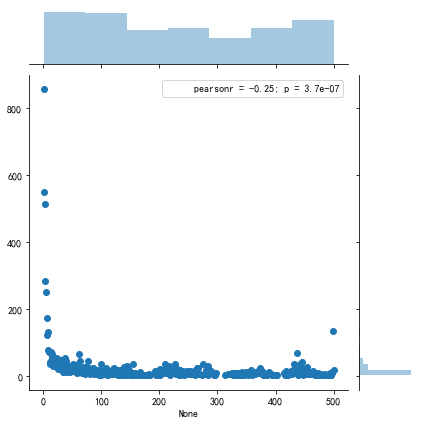

In [44]:
#8000个特征的种类数---其中多少特征是这么些种类数
feature_category=get_feature_category(train)
feature_category_stat=pd.value_counts(feature_category.values).sort_index()
sns.jointplot(x=feature_category_stat.index,y=feature_category_stat.values)
#437种有68列，很可能互相相关吧
#10种及10种一下的列改为类别型数据

In [45]:
def delete_onetype_feature(data):
    feature_category=get_feature_category(data)
    data=data.drop(list(feature_category[feature_category==1.0].index),axis=1)
    return data

In [46]:
train=delete_onetype_feature(train)

In [47]:
train.shape

(500, 7174)

In [48]:
def feature_type_adjustment(data):
    feature_category=get_feature_category(data)
    cat_feature=list(feature_category[feature_category<=10].index)
    for i in cat_feature:
        data[i]=data[i].astype('str')
    return data

In [49]:
train=feature_type_adjustment(train)

In [50]:
pd.value_counts(train.dtypes)

float64    4369
object     2168
int64       637
dtype: int64

In [72]:
train.Y.std()

0.20097034052133608

In [ ]:
from sklearn import preprocessing


In [414]:
def get_feature_median(data):
    numerical_data=data.loc[:,data.dtypes!='object'].copy()
    numerical_feature_var=pd.Series(np.zeros(len(numerical_data.columns)),index=numerical_data.columns)
    for i in numerical_data.columns:
        numerical_feature_var[i]=numerical_data[i].median()
    return numerical_feature_var

In [106]:
train_numerical_feature_median=get_feature_median(train)

In [415]:
train_numerical_feature_median2=get_feature_median(train)

In [416]:
train_numerical_feature_median2.dtypes

dtype('float64')

In [418]:
train_numerical_feature_median2

210X1       1.013000e+02
210X2       5.060000e-01
210X3       2.400000e-01
210X4       1.293000e+00
210X5       6.213000e+01
210X6       3.616000e+00
210X7      -1.850000e-01
210X8       4.000000e-01
210X9      -1.500000e-02
210X10      2.600000e+01
210X11      2.450000e+01
210X12      5.100000e-01
210X13      7.600000e-02
210X14      7.200000e-02
210X15      7.600000e-02
210X16      7.200000e-02
210X20      1.420000e+01
210X23      1.420000e+01
210X24      2.017073e+13
210X25      7.250000e-01
210X26      7.090000e-01
210X32      7.400000e-02
210X33      7.500000e-02
210X34      7.400000e-02
210X35      7.600000e-02
210X39      5.349000e+01
210X40      4.780000e-01
210X41      4.630000e-01
210X42      4.780000e-01
210X43      4.630000e-01
                ...     
750X1397    6.237000e+01
750X1402    2.420000e+01
750X1405    2.420000e+01
750X1413    3.999000e+00
750X1416    3.999000e+00
750X1420    2.080000e+02
750X1421    1.200000e-04
750X1422    1.200000e-04
750X1423    1.200000e-04


In [423]:
train_numerical_feature_median2[train_numerical_feature_median2>1.75E+15]

220X67    2.017073e+15
220X71    2.017073e+15
220X75    2.017073e+15
220X79    2.017073e+15
220X83    2.017073e+15
220X87    2.017073e+15
220X91    2.017073e+15
220X95    2.017073e+15
310X56    2.017080e+15
310X60    2.017080e+15
310X64    2.017080e+15
310X68    2.017080e+15
310X72    2.017080e+15
310X76    2.017080e+15
310X80    2.017080e+15
310X84    2.017080e+15
dtype: float64

In [424]:
train_numerical_feature_median3=train_numerical_feature_median2[train_numerical_feature_median2<1.75E+15]

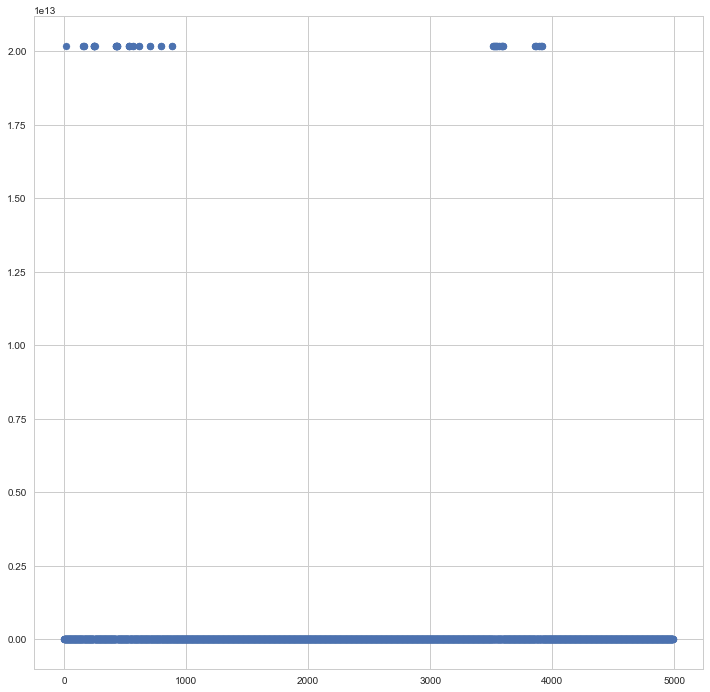

In [425]:
plt.scatter(np.arange(len(train_numerical_feature_median3.values)),train_numerical_feature_median3.values)

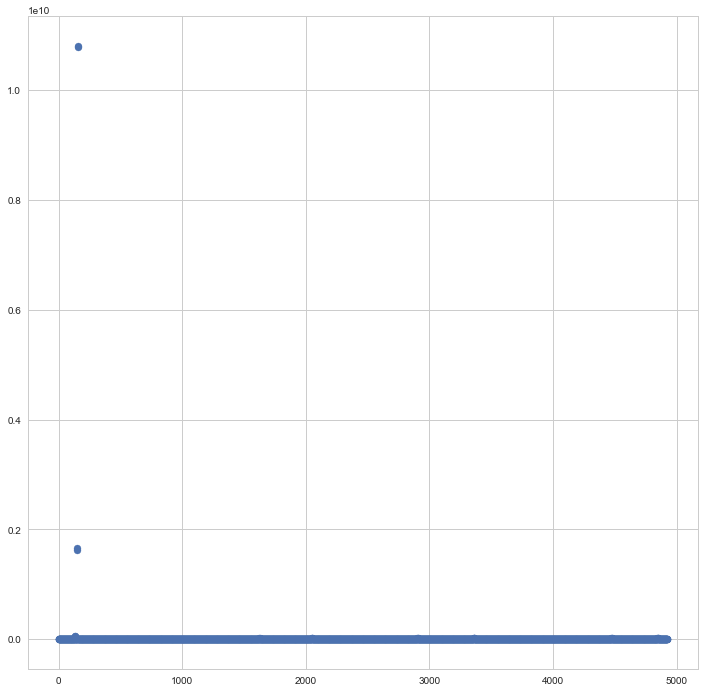

In [427]:
train_numerical_feature_median4=train_numerical_feature_median3[train_numerical_feature_median3<1.75E+13]
plt.scatter(np.arange(len(train_numerical_feature_median4.values)),train_numerical_feature_median4.values)

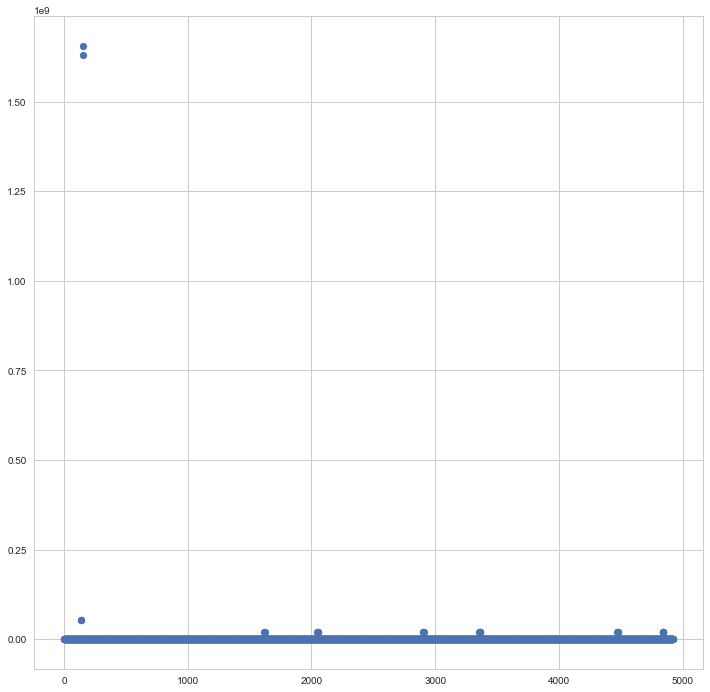

In [428]:
train_numerical_feature_median5=train_numerical_feature_median4[train_numerical_feature_median4<1.0E+10]
plt.scatter(np.arange(len(train_numerical_feature_median5.values)),train_numerical_feature_median5.values)

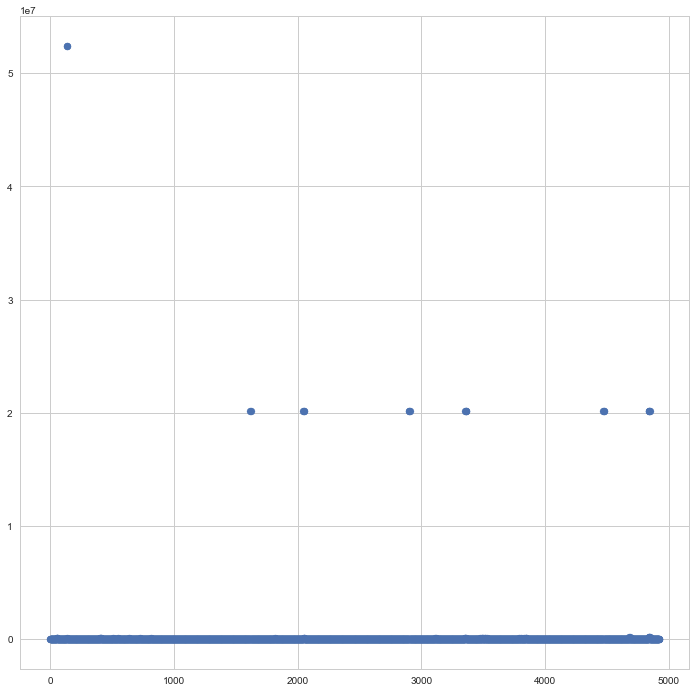

In [429]:
train_numerical_feature_median6=train_numerical_feature_median5[train_numerical_feature_median5<1.5E+9]
plt.scatter(np.arange(len(train_numerical_feature_median6.values)),train_numerical_feature_median6.values)

In [431]:
train_numerical_feature_median6[train_numerical_feature_median6>1.0E+7]

210X184     52389480.0
210X185     52390812.5
330X623     20170803.0
330X640     20170803.0
330X1165    20170803.0
330X1168    20170803.0
330X1169    20170803.0
360X691     20170804.0
360X710     20170804.0
360X711     20170804.0
360X1287    20170804.0
360X1291    20170804.0
360X1292    20170804.0
360X1293    20170804.0
750X691     20170731.0
750X710     20170731.0
750X711     20170731.0
750X1287    20170731.0
750X1291    20170731.0
750X1292    20170731.0
750X1293    20170731.0
dtype: float64

In [488]:
train['330X1165'].unique()

array([20170729, 20170728, 20170727, 20170726, 20170730, 20170731,
       20170803, 20170802, 20170805, 20170804, 20170801, 20170807,
       20170806, 20170809, 20170808, 20170810, 20170811, 20170812, 20170813], dtype=int64)

In [489]:
train['330X1165'].corr(train['Y'])

0.04511894465244936

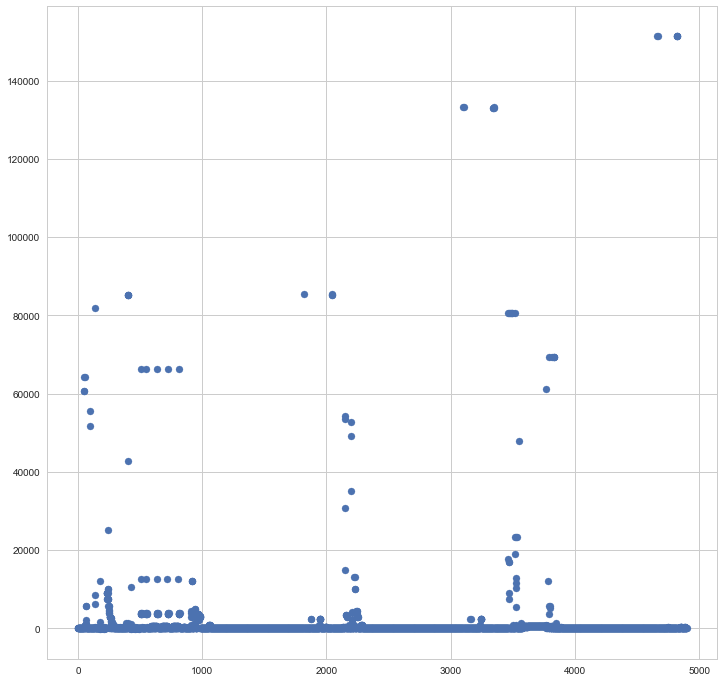

In [432]:
train_numerical_feature_median7=train_numerical_feature_median6[train_numerical_feature_median6<1.0E+7]
plt.scatter(np.arange(len(train_numerical_feature_median7.values)),train_numerical_feature_median7.values)

In [433]:
train_numerical_feature_median7[train_numerical_feature_median7>100000]

360X971     133214.5
360X983     133214.5
360X1288    133083.5
360X1289    133083.5
360X1290    133214.5
360X1294    133083.5
750X971     151410.0
750X983     151410.0
750X1288    151328.0
750X1289    151328.0
750X1290    151410.0
750X1294    151328.0
dtype: float64

In [501]:
train['750X1294'].unique()

array([  74256.,   74323.,   74453.,  195952.,  200350.,  201542.,
        202110.,   41829.,   42052.,   42444.,   42834.,   60243.,
         60311.,   60441.,  203536.,  203604.,  203735.,  203803.,
        203934.,  204003.,  204134.,  204202.,  204333.,  204401.,
        191001.,  193413.,  205953.,  184421.,  190829.,  110011.,
        112412.,  132813.,  132841.,  133011.,  101959.,  102027.,
        102157.,  182242.,  182440.,   84845.,   91304.,  175203.,
        125235.,  145532.,  175333.,  151924.,   84534.,   84602.,
         84732.,  210148.,  215244.,  212550.,  221629.,  214559.,
        183536.,  185939.,  163928.,  163956.,  164126.,   34600.,
         34628.,   34758.,  181308.,  211329.,  211357.,  211527.,
        145559.,  180526.,  181714.,  181741.,  182928.,  192631.,
         91334.,  103914.,  111043.,  211554.,  212346.,  212544.,
        213533.,  213729.,   90217.,  170024.,  170052.,  170222.,
        195726.,  202138.,  181346.,   64048.,  181543.,  1821

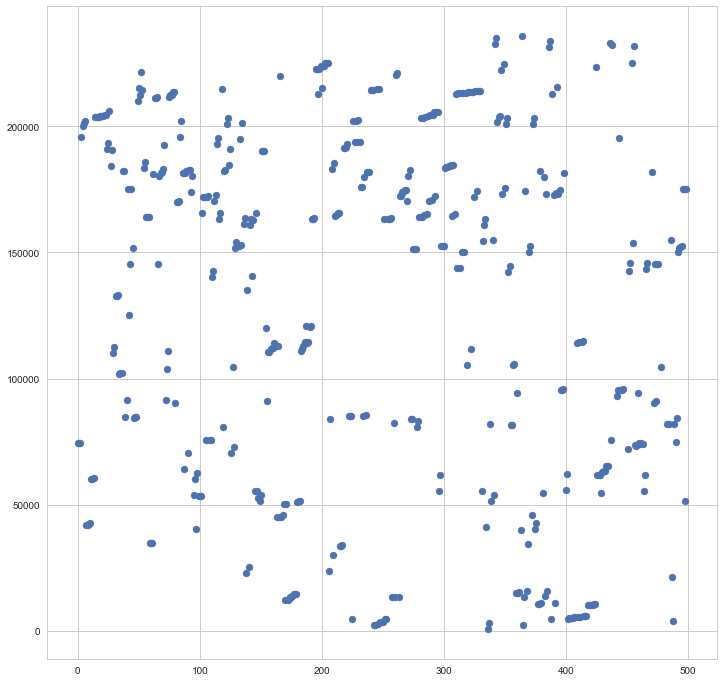

In [502]:
plt.scatter(np.arange(500),train['750X1294'])

In [503]:
train['750X1294'].corr(train['Y'])

0.094819741100161628

In [438]:
train_numerical_feature_median7[train_numerical_feature_median7>10000]

210X81       60595.5200
210X82       64314.4550
210X83       60676.5275
210X84       64364.5950
210X144      51752.7800
210X145      55503.7400
210X186      81914.0500
220X32       11999.0000
220X266      25036.5000
300X1        85185.0000
300X5        85194.0000
300X8        85185.5000
300X11       42882.5000
300X12       85189.5000
310X33       10541.0000
311X48       12556.5000
311X55       66269.0000
311X139      12556.5000
311X143      66269.0000
261X315      12558.0000
261X329      66269.0000
261X501      12559.5000
261X515      66269.0000
261X687      12560.0000
261X701      66270.0000
312X463      12006.0000
312X469      11998.0000
312X470      11998.0000
330X878      85531.0000
330X1166     85107.0000
               ...     
400X5        80650.0000
400X32       16865.5000
400X33       16934.5000
400X59       80651.0000
400X63       80651.0000
400X82       80650.0000
400X167      80651.0000
400X170      80638.0000
400X218      80651.0000
420X4        19050.0000
420X8        233

In [504]:
train['210X145'].unique()

array([ 55829.36 ,  76930.29 ,  48341.33 ,  76768.31 ,  76231.68 ,
        76963.165,  55718.705,  56070.99 ,  55812.75 ,  77259.915,
        48968.815,  25311.725,  25354.785,  25413.4  ,  77004.665,
        48442.915,  56027.165,  77252.655,  48265.325,  55974.02 ,
        77456.955,  27356.435,  55851.065,  77240.565,  56244.76 ,
        49134.635,  55728.06 ,  49642.945,  56430.055,  56164.44 ,
        49138.645,  55711.725,  49539.12 ,  55709.085,  25467.41 ,
        25537.09 ,  25382.485,  76562.325,  76988.73 ,  55977.05 ,
        77417.74 ,  76651.955,  56014.885,  77020.955,  55998.375,
        77244.545,  25553.07 ,  25497.44 ,  25489.47 ,  25596.965,
        25336.9  ,  25349.17 ,  25216.82 ,  25458.69 ,  48797.93 ,
        48806.15 ,  49101.46 ,  55549.87 ,  49337.375,  55607.49 ,
        55323.28 ,  55265.465,  25239.255,  48255.06 ,  56187.72 ,
        77334.03 ,  56099.58 ,  25185.615,  25212.76 ,  25300.71 ,
        25316.51 ,  77012.94 ,  77140.105,  77598.96 ,  48302.

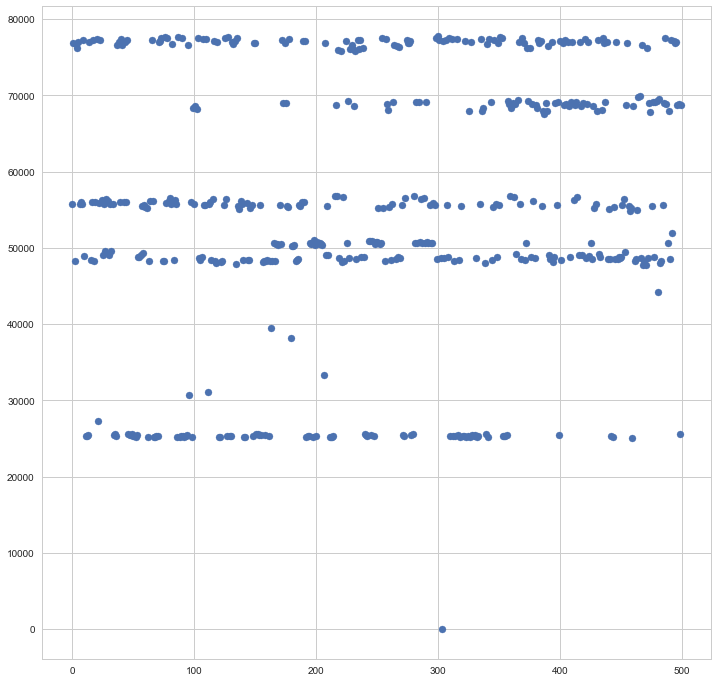

In [505]:
plt.scatter(np.arange(500),train['210X145'])

In [506]:
train['210X145'].corr(train['Y'])

0.038126606321676679

In [507]:
test_a['360X65'].corr(test_a['360X64'])

1.0

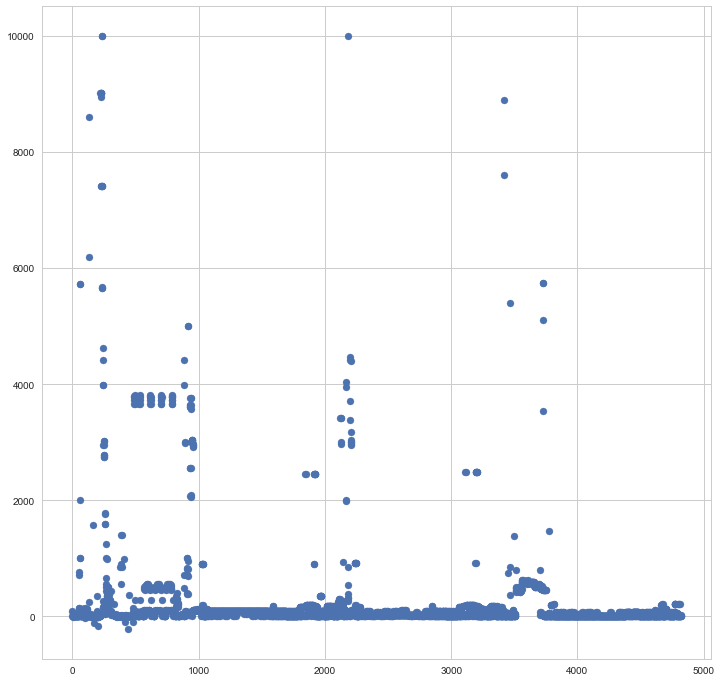

In [439]:
train_numerical_feature_median8=train_numerical_feature_median7[train_numerical_feature_median7<10000]
plt.scatter(np.arange(len(train_numerical_feature_median8.values)),train_numerical_feature_median8.values)

In [440]:
train_numerical_feature_median8[train_numerical_feature_median8>1000]

210X101     2000.10
210X104     5734.30
210X106     5735.50
210X187     8601.77
210X188     6199.45
220X33      1579.00
220X241     9020.50
220X247     7411.50
220X248     8951.50
220X249     9015.50
220X251     9015.50
220X253     9015.50
220X254     9015.50
220X256     7411.50
220X258     9020.50
220X261     7411.50
220X262     9999.00
220X263     7411.50
220X264     7411.50
220X265     9999.00
220X269     5677.00
220X270     5668.00
220X271     5666.00
220X272     4628.00
220X273     4427.00
220X275     3985.50
220X276     3985.50
220X279     2959.00
220X280     2959.00
220X282     3015.50
             ...   
344X294     9995.00
344X335     4423.00
344X336     3386.00
344X338     4467.00
344X339     3716.00
344X341     4403.00
344X342     3178.00
344X347     3011.00
344X348     3011.95
344X350     3042.00
344X351     2965.00
344X352     2955.00
360X1041    2487.10
360X1044    2487.10
360X1126    2487.10
360X1127    2487.10
360X1128    2487.10
360X1130    2487.10
360X1131    2487.10


In [ ]:
train_numerical_feature_median8=train_numerical_feature_median7[train_numerical_feature_median7<10000]
plt.scatter(np.arange(len(train_numerical_feature_median8.values)),train_numerical_feature_median8.values)

In [108]:
train_numerical_feature_median['len']=train_numerical_feature_median[0].apply(len)

In [111]:
train_numerical_feature_median['len'].value_counts()

5     1805
4     1100
6     1042
7      503
3      316
8       84
17      73
9       34
10      33
16       8
13       3
12       3
11       2
Name: len, dtype: int64

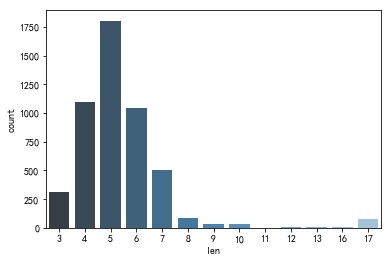

In [206]:
sns.countplot(x='len',data=train_numerical_feature_median,palette='Blues_d')

In [207]:
train_numerical_feature_median[train_numerical_feature_median['len']==8]

,index,0,len
52,210X81,60595.52,8
78,210X118,126.7725,8
79,210X119,131.1825,8
80,210X120,126.7575,8
90,210X134,126.7575,8
91,210X135,131.2225,8
96,210X144,51752.78,8
97,210X145,55503.74,8
100,210X148,131.9075,8
108,210X156,133.7225,8


In [114]:
train_numerical_feature_median[train_numerical_feature_median['len']==17][0].str.contains('2.017').sum()
# 证明全部17长度的都是时间，16也是

73

In [124]:
train_numerical_feature_median[train_numerical_feature_median['len']==5]

,index,0,len
0,210X1,101.3,5
1,210X2,0.506,5
3,210X4,1.293,5
4,210X5,62.13,5
5,210X6,3.616,5
12,210X13,0.076,5
13,210X14,0.072,5
14,210X15,0.076,5
15,210X16,0.072,5
19,210X25,0.725,5


In [102]:
train.ix[:,['750X1424']].astype('str').sort_values(by='750X1424')

,750X1424
353,0.00054
39,0.00055
173,0.00055
170,0.00055
36,0.00057
101,0.00058
254,0.00058
136,0.00058
172,0.00058
116,0.00059


In [103]:
train.ix[:,['750X1451']].astype('str').sort_values(by='750X1451')

,750X1451
353,0.00054
39,0.00055
173,0.00055
170,0.00055
36,0.00057
101,0.00058
254,0.00058
136,0.00058
172,0.00058
116,0.00059


In [104]:
train.ix[:,['210X24']].astype('str').sort_values(by='210X24')

,210X24
72,20166616661666
406,20166616661666
441,20166616661666
114,20166616661666
116,20166616661666
325,20170715132228
327,20170715142359
207,20170718085150
273,20170718085401
274,20170718085911


In [ ]:
#train.iloc[:,train.dtype=='object']

In [153]:
train.iloc[:,train.columns.str.lower().str.contains('tool')]

,TOOL_ID,Tool,TOOL_ID (#1),TOOL_ID (#2),TOOL_ID (#3),Tool (#1),Tool (#2),tool,tool (#1),TOOL,TOOL (#1),Tool (#3),TOOL (#2)
0,N,B,E,E,E0,329,C,3009,W,D,YX1,11,A
1,M,B,E,E,E0,215,C,4106,X,D,YX1,11,A
2,L,B,E,E,E0,329,C,3009,W,D,YX1,11,A
3,M,B,E,E,E0,215,B,3009,X,D,YX1,11,A
4,M,B,E,E,E0,215,B,3009,W,D,YX1,13,A
5,M,B,E,E,E0,215,B,3009,W,D,YX1,12,A
6,N,B,E,E,E0,329,B,4106,X,D,YX1,13,A
7,N,B,E,E,E0,530,C,4106,W,D,YX1,14,A
8,N,B,E,E,E0,530,C,3009,X,D,YX1,15,A
9,M,B,E,E,E0,1113,C,3009,V,D,YX1,11,A


In [154]:
#每种tool有多少种
train_tool=train.iloc[:,train.columns.str.lower().str.contains('tool')]
train_tool.apply(lambda x:len(x.unique()))

TOOL_ID          6
Tool             2
TOOL_ID (#1)     2
TOOL_ID (#2)     3
TOOL_ID (#3)     2
Tool (#1)        8
Tool (#2)        3
tool             4
tool (#1)        9
TOOL             3
TOOL (#1)        2
Tool (#3)       10
TOOL (#2)        2
dtype: int64

In [162]:
train_tool['all']=''
for i in train_tool.columns:
    train_tool['all']=train_tool['all']+train_tool[i]

c:\users\yechao\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\yechao\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [169]:
#几乎没有机器相同的样本
len(train_tool['all'].unique())

480

In [156]:
train_tool.corr(train['Y'])

c:\users\yechao\appdata\local\programs\python\python35\lib\site-packages\pandas\core\ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [173]:
def get_null_count(data):
    feature=data.columns
    null_count=pd.Series(np.zeros(len(feature)),index=feature)
    for i in feature:
        null_count[i]=data[i].isnull().sum()
    return null_count
null_stat=get_null_count(train)

In [176]:
#空缺值数量--此空缺值对应的列数
null_stat.value_counts()

0.0      5917
14.0     1051
4.0        80
3.0        54
278.0      26
1.0        23
60.0        7
24.0        2
21.0        2
100.0       1
15.0        1
27.0        1
44.0        1
28.0        1
16.0        1
10.0        1
23.0        1
29.0        1
2.0         1
7.0         1
39.0        1
dtype: int64

In [177]:
def get_null_count_row(data):
    row_null=data.isnull().sum(axis=1)
    return row_null
null_stat_row=get_null_count_row(train)

In [178]:
null_stat_row.value_counts()

26      114
0        96
27       59
1        53
28       32
33       20
2        19
3        17
29       17
7        14
34       13
8         7
31        4
30        4
4         4
80        3
1076      2
1052      2
36        2
1079      2
5         2
9         1
1134      1
1130      1
87        1
1078      1
10        1
82        1
1077      1
1081      1
1080      1
1054      1
35        1
49        1
1051      1
dtype: int64

In [195]:
def find_time_feature(data):
    df=data.iloc[:,data.columns.str.lower().str.contains('x')]
    df=df.fillna(0).astype('float')
    numerical_feature_median=pd.Series(np.zeros(len(df.columns)),index=df.columns)
    numerical_feature_median
    for i in df.columns:
        numerical_feature_median[i]=df[i].median()
    time_feature=numerical_feature_median[numerical_feature_median.astype('str').str.contains('2017')| numerical_feature_median.astype('str').str.contains('2.017')]
    return time_feature

In [196]:
train_time_feature=find_time_feature(train)

In [197]:
train_time_feature.shape

(104,)

In [198]:
train_time_feature

210X24      2.017073e+13
210X204     2.017073e+13
210X205     2.017073e+13
210X213     2.017073e+13
210X215     2.017073e+13
220X67      2.017073e+15
220X71      2.017073e+15
220X75      2.017073e+15
220X79      2.017073e+15
220X83      2.017073e+15
220X87      2.017073e+15
220X91      2.017073e+15
220X95      2.017073e+15
220X225     2.017073e+13
220X226     2.017073e+13
220X227     2.017073e+13
220X228     2.017073e+13
220X229     2.017073e+13
220X230     2.017073e+13
220X231     2.017073e+13
220X232     2.017073e+13
220X233     2.017071e+13
220X234     2.017071e+13
220X235     2.017071e+13
220X236     2.017071e+13
300X2       2.017073e+13
300X3       2.017073e+13
300X4       2.017073e+13
300X6       2.017073e+13
300X7       2.017073e+13
                ...     
400X61      2.017080e+13
400X64      2.017080e+13
400X65      2.017080e+13
400X83      2.017080e+13
400X84      2.017080e+13
400X168     2.017080e+13
400X169     2.017080e+13
400X219     2.017080e+13
400X220     2.017080e+13


In [218]:
train_tool['Y']=0
train_tool['Y']=train['Y'].copy()

c:\users\yechao\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\yechao\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [219]:
train_tool

,TOOL_ID,Tool,TOOL_ID (#1),TOOL_ID (#2),TOOL_ID (#3),Tool (#1),Tool (#2),tool,tool (#1),TOOL,TOOL (#1),Tool (#3),TOOL (#2),all,Y
0,N,B,E,E,E0,329,C,3009,W,D,YX1,11,A,NBEEE0329C3009WDYX111ANBEEE0329C3009WDYX111A,2.945079
1,M,B,E,E,E0,215,C,4106,X,D,YX1,11,A,MBEEE0215C4106XDYX111AMBEEE0215C4106XDYX111A,2.955092
2,L,B,E,E,E0,329,C,3009,W,D,YX1,11,A,LBEEE0329C3009WDYX111ALBEEE0329C3009WDYX111A,2.741264
3,M,B,E,E,E0,215,B,3009,X,D,YX1,11,A,MBEEE0215B3009XDYX111AMBEEE0215B3009XDYX111A,2.799336
4,M,B,E,E,E0,215,B,3009,W,D,YX1,13,A,MBEEE0215B3009WDYX113AMBEEE0215B3009WDYX113A,2.692093
5,M,B,E,E,E0,215,B,3009,W,D,YX1,12,A,MBEEE0215B3009WDYX112AMBEEE0215B3009WDYX112A,2.625853
6,N,B,E,E,E0,329,B,4106,X,D,YX1,13,A,NBEEE0329B4106XDYX113ANBEEE0329B4106XDYX113A,2.698007
7,N,B,E,E,E0,530,C,4106,W,D,YX1,14,A,NBEEE0530C4106WDYX114ANBEEE0530C4106WDYX114A,2.788231
8,N,B,E,E,E0,530,C,3009,X,D,YX1,15,A,NBEEE0530C3009XDYX115ANBEEE0530C3009XDYX115A,2.773453
9,M,B,E,E,E0,1113,C,3009,V,D,YX1,11,A,MBEEE01113C3009VDYX111AMBEEE01113C3009VDYX111A,2.851242


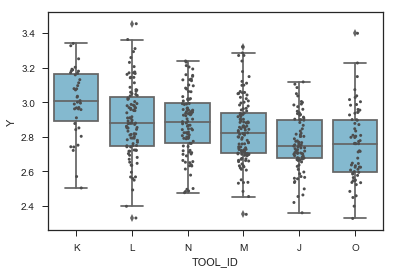

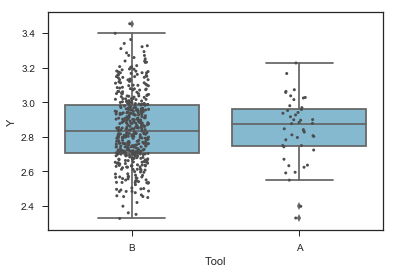

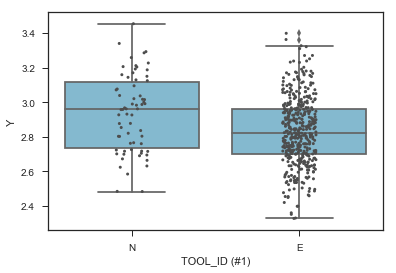

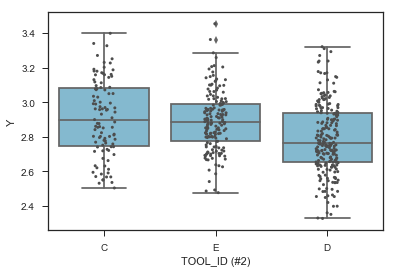

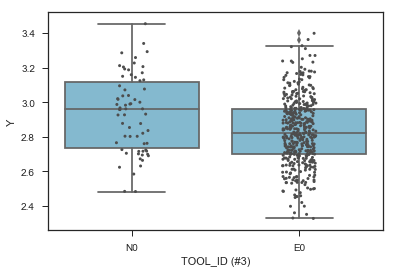

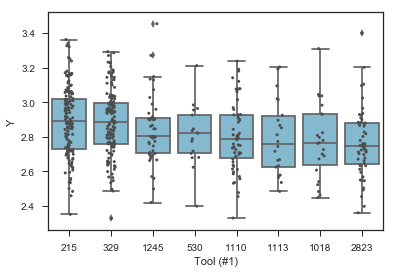

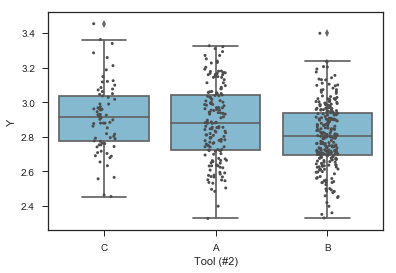

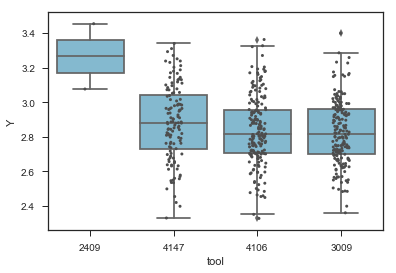

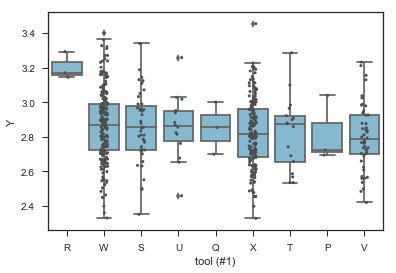

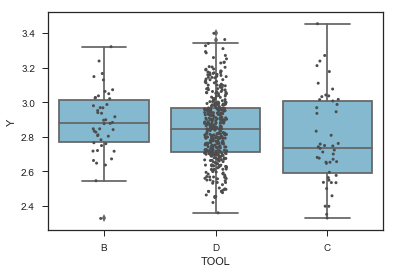

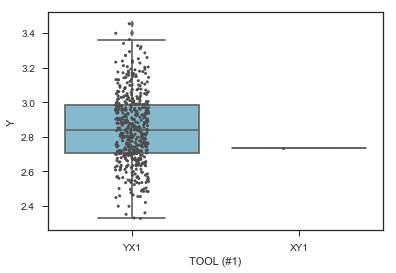

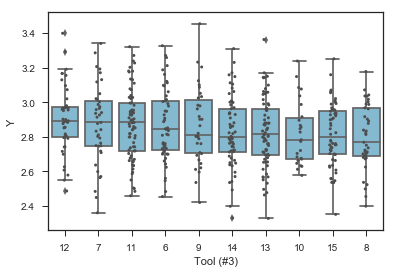

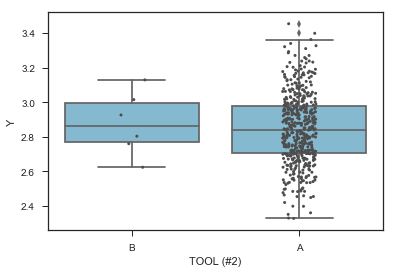

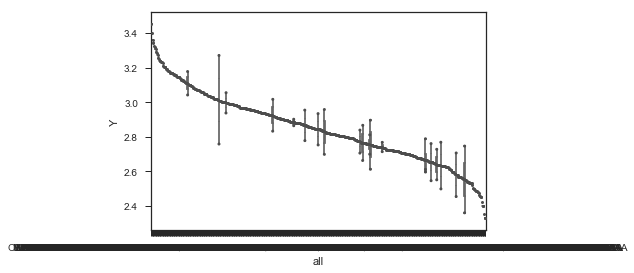

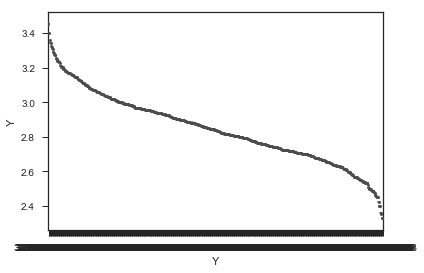

In [236]:
sns.set(style="ticks", palette="muted", color_codes=True)
for i in train_tool.columns:
    fig=plt.figure()
    ranks = train_tool.groupby(by=[i])['Y'].mean().fillna(0).sort_values()[::-1].index
    sns.boxplot(x=i,y='Y',data=train_tool,color="c",order = ranks)
    sns.stripplot(x=i, y="Y", data=train_tool,jitter=True, size=3, color=".3", linewidth=0, order = ranks)

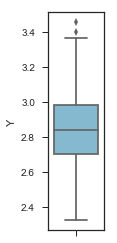

In [242]:
# 实验一下画图
plt.figure(figsize=(1,4))
sns.boxplot(y='Y',data=train_tool, color="c",order = ranks)

In [272]:
test_a.shape

(100, 8028)

In [273]:
test_b.shape

(121, 8028)

In [287]:
test_a_tool=test_a.iloc[:,test_a.columns.str.lower().str.contains('tool')]
tool_cat_a=test_a_tool.apply(lambda x:len(x.unique()))

In [288]:
test_b_tool=test_b.iloc[:,test_b.columns.str.lower().str.contains('tool')]
tool_cat_b=test_b_tool.apply(lambda x:len(x.unique()))

In [277]:
'''
TOOL_ID          6
Tool             2
TOOL_ID (#1)     2
TOOL_ID (#2)     3 #
TOOL_ID (#3)     2
Tool (#1)        8 #
Tool (#2)        3
tool             4 #
tool (#1)        9 #
TOOL             3 #
TOOL (#1)        2
Tool (#3)       10 #
TOOL (#2)        2
'''
train_tool2=train.iloc[:,train.columns.str.lower().str.contains('tool')]
tool_cat_train=train_tool2.apply(lambda x:len(x.unique()))

In [278]:
test=pd.concat([test_a,test_b])

In [279]:
test_tool=test_b.iloc[:,test.columns.str.lower().str.contains('tool')]
tool_cat_test=test_tool.apply(lambda x:len(x.unique()))

In [289]:
tool_cat=pd.DataFrame({'train':tool_cat_train,'test':tool_cat_test,'a':tool_cat_a,'b':tool_cat_b})

In [290]:
tool_cat

,a,b,test,train
TOOL_ID,6,5,5,6
Tool,2,2,2,2
TOOL_ID (#1),2,2,2,2
TOOL_ID (#2),2,3,3,3
TOOL_ID (#3),2,2,2,2
Tool (#1),9,8,8,8
Tool (#2),3,3,3,3
tool,3,3,3,4
tool (#1),8,6,6,9
TOOL,2,3,3,3


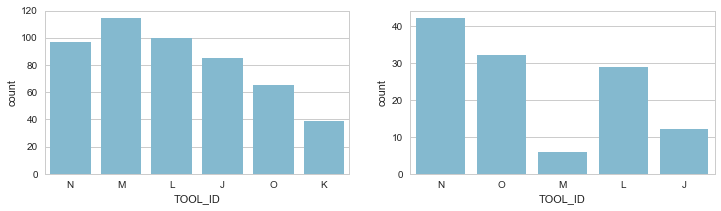

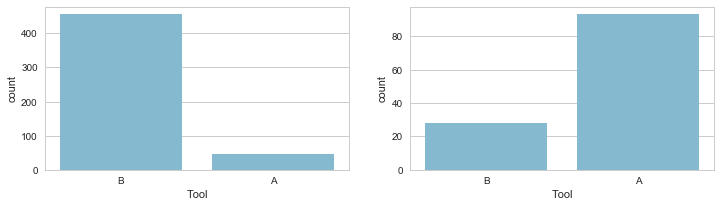

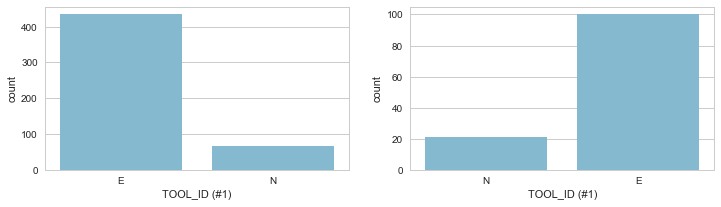

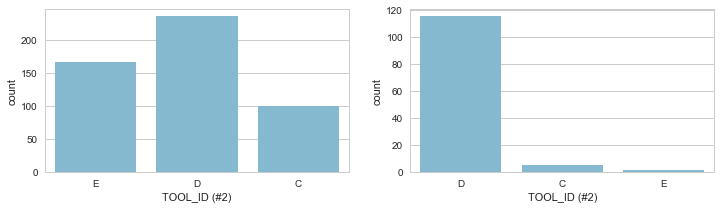

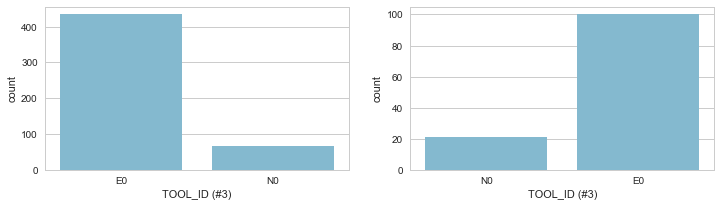

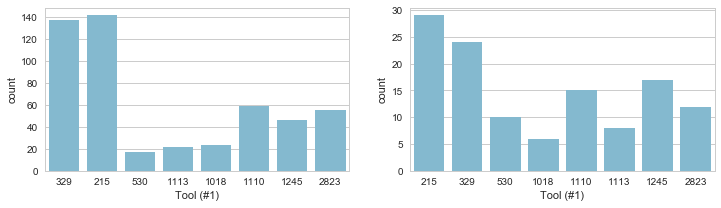

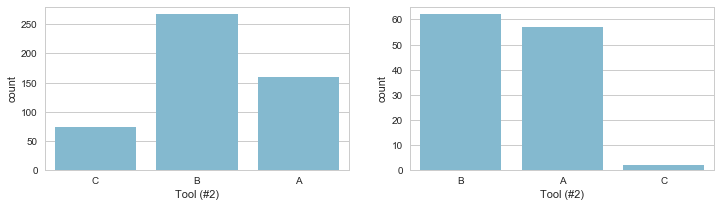

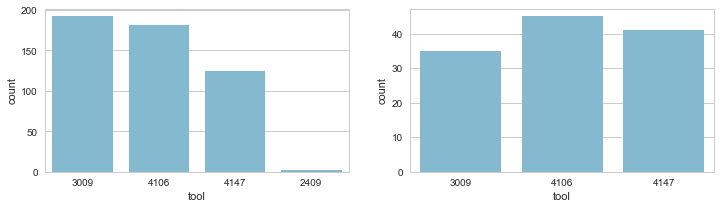

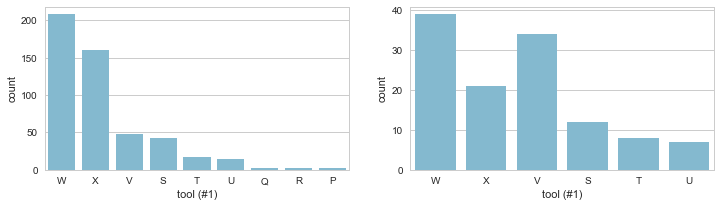

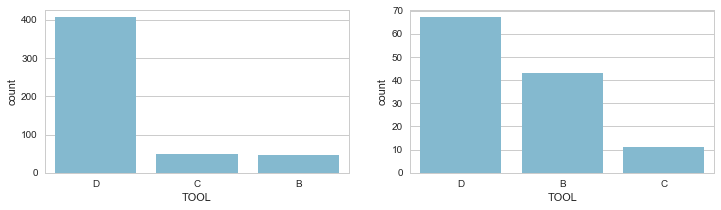

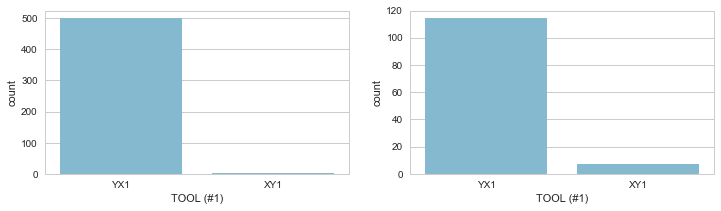

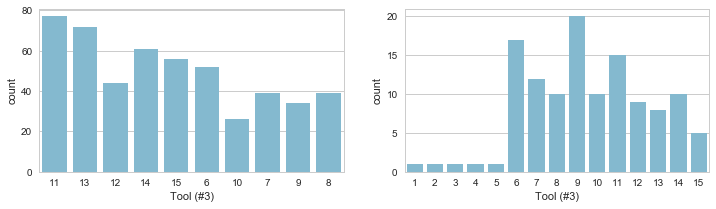

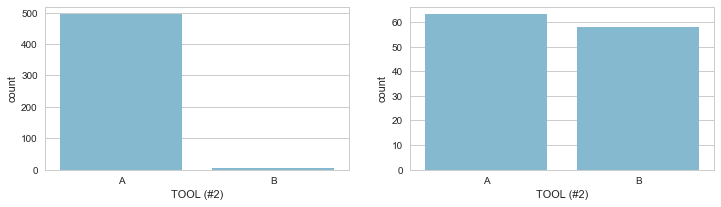

In [301]:
sns.set_style("whitegrid")
for i in test_tool.columns:
    fig,axes=plt.subplots(1,2,figsize=(12,3))
    sns.countplot(x=i,data=train_tool,color="c",ax=axes[0])
    sns.countplot(x=i,data=test_tool,color="c",ax=axes[1])

In [302]:
train_time_feature=train.loc[:,train_time_feature.index].copy()

In [309]:
train_time_feature

,210X24,210X204,210X205,210X213,210X215,220X67,220X71,220X75,220X79,220X83,...,520X348,520X354,520X356,750X691,750X710,750X711,750X1287,750X1291,750X1292,750X1293
0,20170725030628,20170725031229,20170725030712,2.017073e+13,2.017073e+13,2.017073e+15,2017072611214726,2.017073e+15,2017072611220489,2.017073e+15,...,20170724224239,20170724224338,20170724224251,20170727.0,20170727.0,20170727.0,20170727.0,20170727.0,20170727.0,20170727.0
1,20170725030849,20170725031537,20170725031021,2.017073e+13,2.017073e+13,2.017073e+15,2017072611203201,2.017073e+15,2017072611204792,2.017073e+15,...,20170724224356,20170724224456,20170724224408,20170727.0,20170727.0,20170727.0,20170727.0,20170727.0,20170727.0,20170727.0
2,20170725031113,20170725031807,20170725031250,2.017073e+13,2.017073e+13,2.017073e+15,2017072611191653,2.017073e+15,2017072611193410,2.017073e+15,...,20170724224513,20170724224623,20170724224535,20170727.0,20170727.0,20170727.0,20170727.0,20170727.0,20170727.0,20170727.0
3,20170723105612,20170723110319,20170723105803,2.017072e+13,2.017072e+13,2.017073e+15,2017072502090981,2.017073e+15,2017072502093412,2.017073e+15,...,20170723085325,20170723090341,20170723090253,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0
4,20170723111008,20170723111759,20170723111243,2.017072e+13,2.017072e+13,2.017073e+15,2017072502044293,2.017073e+15,2017072502050735,2.017073e+15,...,20170723091314,20170723091413,20170723091326,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0
5,20170723115220,20170723120156,20170723115640,2.017072e+13,2.017072e+13,2.017073e+15,2017072501510239,2.017073e+15,2017072501514375,2.017073e+15,...,20170723094917,20170723095017,20170723094929,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0
6,20170723121001,20170723121652,20170723121136,2.017072e+13,2.017072e+13,2.017073e+15,2017072501422837,2.017073e+15,2017072501460657,2.017073e+15,...,20170723095850,20170723100000,20170723095912,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0
7,20170723093642,20170723094341,20170723093825,2.017072e+13,2.017072e+13,2.017072e+15,2017072421135804,2.017072e+15,2017072421141903,2.017072e+15,...,20170723054619,20170723054719,20170723054631,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0
8,20170723094350,20170723095105,20170723094549,2.017072e+13,2.017072e+13,2.017072e+15,2017072421101384,2.017072e+15,2017072421103146,2.017072e+15,...,20170723055335,20170723055435,20170723055347,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0
9,20170723095328,20170723100201,20170723095646,2.017072e+13,2.017072e+13,2.017072e+15,2017072421041285,2.017072e+15,2017072421043757,2.017072e+15,...,20170723060142,20170723061157,20170723061110,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0,20170725.0


In [316]:
train_time_feature.dtypes

210X24        int64
210X204       int64
210X205       int64
210X213     float64
210X215     float64
220X67      float64
220X71        int64
220X75      float64
220X79        int64
220X83      float64
220X87        int64
220X91      float64
220X95        int64
220X225       int64
220X226       int64
220X227       int64
220X228       int64
220X229       int64
220X230       int64
220X231       int64
220X232       int64
220X233      object
220X234      object
220X235      object
220X236      object
300X2       float64
300X3       float64
300X4       float64
300X6       float64
300X7       float64
             ...   
400X61        int64
400X64        int64
400X65        int64
400X83        int64
400X84        int64
400X168       int64
400X169       int64
400X219       int64
400X220       int64
420X7         int64
420X9         int64
420X25        int64
420X27        int64
520X148       int64
520X152       int64
520X171     float64
520X173       int64
520X248       int64
520X250       int64


In [318]:
train_time_feature.loc[:,train_time_feature.dtypes=='object']

,220X233,220X234,220X235,220X236
0,20170713110723,20170713110723,20170705163823,20170705163823
1,20170713110723,20170713110723,20170705163823,20170705163823
2,20170713110723,20170713110723,20170705163823,20170705163823
3,20170713110723,20170713110723,20170705163823,20170705163823
4,20170713110723,20170713110723,20170705163823,20170705163823
5,20170713110723,20170713110723,20170705163823,20170705163823
6,20170713110723,20170713110723,20170705163823,20170705163823
7,20170713110723,20170713110723,20170705163823,20170705163823
8,20170713110723,20170713110723,20170705163823,20170705163823
9,20170713110723,20170713110723,20170705163823,20170705163823


In [320]:
train_time_feature.loc[:,train_time_feature.dtypes=='int64']

,210X24,210X204,210X205,220X71,220X79,220X87,220X95,220X225,220X226,220X227,...,420X27,520X148,520X152,520X173,520X248,520X250,520X346,520X348,520X354,520X356
0,20170725030628,20170725031229,20170725030712,2017072611214726,2017072611220489,2017072611214304,2017072611220135,20170726110800,20170726110800,20170726105236,...,20170730203341,20170724224505,20170724224422,20170724224112,20170724224422,20170724224338,20170724224251,20170724224239,20170724224338,20170724224251
1,20170725030849,20170725031537,20170725031021,2017072611203201,2017072611204792,2017072611202779,2017072611204440,20170726110647,20170726110647,20170726105132,...,20170730203532,20170724224633,20170724224550,20170724224158,20170724224550,20170724224456,20170724224408,20170724224356,20170724224456,20170724224408
2,20170725031113,20170725031807,20170725031250,2017072611191653,2017072611193410,2017072611191231,2017072611193059,20170726110533,20170726110533,20170726105030,...,20170730203647,20170724224800,20170724224717,20170724224244,20170724224717,20170724224623,20170724224535,20170724224513,20170724224623,20170724224535
3,20170723105612,20170723110319,20170723105803,2017072502090981,2017072502093412,2017072502090560,2017072502093060,20170725022729,20170725022729,20170725021112,...,20170729160213,20170723090608,20170723090525,20170723084627,20170723090525,20170723090341,20170723090253,20170723085325,20170723090341,20170723090253
4,20170723111008,20170723111759,20170723111243,2017072502044293,2017072502050735,2017072502043871,2017072502050384,20170725022141,20170725022141,20170725020646,...,20170729160954,20170723091540,20170723091457,20170723085422,20170723091457,20170723091413,20170723091326,20170723091314,20170723091413,20170723091326
5,20170723115220,20170723120156,20170723115640,2017072501510239,2017072501514375,2017072501505818,2017072501514021,20170725020715,20170725020715,20170725015322,...,20170729162951,20170723095144,20170723095101,20170723093022,20170723095101,20170723095017,20170723094929,20170723094917,20170723095017,20170723094929
6,20170723121001,20170723121652,20170723121136,2017072501422837,2017072501460657,2017072501422415,2017072501460301,20170725020045,20170725020045,20170725014745,...,20170729164415,20170723100227,20170723100144,20170723095143,20170723100144,20170723100000,20170723095912,20170723095850,20170723100000,20170723095912
7,20170723093642,20170723094341,20170723093825,2017072421135804,2017072421141903,2017072421135381,2017072421141550,20170724213239,20170724213239,20170724211626,...,20170729224114,20170723054953,20170723054910,20170723053930,20170723054910,20170723054719,20170723054631,20170723054619,20170723054719,20170723054631
8,20170723094350,20170723095105,20170723094549,2017072421101384,2017072421103146,2017072421100964,2017072421102793,20170724212901,20170724212901,20170724211239,...,20170729224608,20170723055708,20170723055626,20170723054555,20170723055626,20170723055435,20170723055347,20170723055335,20170723055435,20170723055347
9,20170723095328,20170723100201,20170723095646,2017072421041285,2017072421043757,2017072421040865,2017072421043403,20170724212357,20170724212357,20170724210627,...,20170729225221,20170723061422,20170723061340,20170723055445,20170723061340,20170723061157,20170723061110,20170723060142,20170723061157,20170723061110


In [321]:
train_time_feature_describe=train_time_feature.describe()

In [322]:
train_time_feature_describe.to_csv(r'C:\Python\kaggle\@ON-工业AI\data\tmp\train_time_feature_describe.csv')

In [328]:
train_time_feature_describe_str=train_time_feature_describe.T.sort_index(by='50%')

c:\users\yechao\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [330]:
train_time_feature_describe_str.to_csv(r'C:\Python\kaggle\@ON-工业AI\data\tmp\train_time_feature_describe_str.csv')

In [331]:
train_time_feature_describe_str

,count,mean,std,min,25%,50%,75%,max
750X1293,486.0,2.017076e+07,3.875927e+01,2.017072e+07,2.017073e+07,2.017073e+07,2.017080e+07,2.017081e+07
750X691,486.0,2.017076e+07,3.875927e+01,2.017072e+07,2.017073e+07,2.017073e+07,2.017080e+07,2.017081e+07
750X710,486.0,2.017076e+07,3.875927e+01,2.017072e+07,2.017073e+07,2.017073e+07,2.017080e+07,2.017081e+07
750X1292,486.0,2.017076e+07,3.875927e+01,2.017072e+07,2.017073e+07,2.017073e+07,2.017080e+07,2.017081e+07
750X1287,486.0,2.017076e+07,3.875927e+01,2.017072e+07,2.017073e+07,2.017073e+07,2.017080e+07,2.017081e+07
750X1291,486.0,2.017076e+07,3.875927e+01,2.017072e+07,2.017073e+07,2.017073e+07,2.017080e+07,2.017081e+07
750X711,486.0,2.017076e+07,3.875927e+01,2.017072e+07,2.017073e+07,2.017073e+07,2.017080e+07,2.017081e+07
330X640,500.0,2.017078e+07,3.708762e+01,2.017073e+07,2.017073e+07,2.017080e+07,2.017081e+07,2.017081e+07
330X1165,500.0,2.017078e+07,3.708762e+01,2.017073e+07,2.017073e+07,2.017080e+07,2.017081e+07,2.017081e+07
330X1168,500.0,2.017078e+07,3.708762e+01,2.017073e+07,2.017073e+07,2.017080e+07,2.017081e+07,2.017081e+07


In [347]:
train_time_feature_describe_str2=pd.read_csv(r'C:\Python\kaggle\@ON-工业AI\data\tmp\train_time_feature_describe_str.csv')
train_time_feature_exp=train_time_feature_describe_str2[['min','50%','max']].copy()
train_time_feature_exp=train_time_feature_exp.astype('str')
for i in train_time_feature_exp.columns:
    train_time_feature_exp[i]=train_time_feature_exp[i].map(lambda x:x[:8])

In [348]:
train_time_feature_exp

,min,50%,max
0,20170716,20170731,20170811
1,20170716,20170731,20170811
2,20170716,20170731,20170811
3,20170716,20170731,20170811
4,20170716,20170731,20170811
5,20170716,20170731,20170811
6,20170716,20170731,20170811
7,20170726,20170803,20170813
8,20170726,20170803,20170813
9,20170726,20170803,20170813


In [349]:
check_tool_timeline=train.loc[:3,train_time_feature.columns].copy()

In [350]:
check_tool_timeline.to_csv(r'C:\Python\kaggle\@ON-工业AI\data\tmp\check_toll_timeline.csv')

In [354]:
time_feature_17=train_numerical_feature_median[train_numerical_feature_median['len']==17]['index'].values
time_feature_16=train_numerical_feature_median[train_numerical_feature_median['len']==16]['index'].values
for i in time_feature_17:
    check_tool_timeline[i]=round(check_tool_timeline[i]/10000)
for i in time_feature_16:
    check_tool_timeline[i]=round(check_tool_timeline[i]/10000)

In [356]:
check_tool_timeline_1=check_tool_timeline.astype('str')
for i in check_tool_timeline_1.columns:
    check_tool_timeline_1[i]=check_tool_timeline_1[i].map(lambda x:x[:8])
check_tool_timeline_1

,210X24,210X204,210X205,210X213,210X215,220X67,220X71,220X75,220X79,220X83,...,520X348,520X354,520X356,750X691,750X710,750X711,750X1287,750X1291,750X1292,750X1293
0,20170725,20170725,20170725,20170725,20170725,20170726,20170726,20170726,20170726,20170726,...,20170724,20170724,20170724,20170727,20170727,20170727,20170727,20170727,20170727,20170727
1,20170725,20170725,20170725,20170725,20170725,20170726,20170726,20170726,20170726,20170726,...,20170724,20170724,20170724,20170727,20170727,20170727,20170727,20170727,20170727,20170727
2,20170725,20170725,20170725,20170725,20170725,20170726,20170726,20170726,20170726,20170726,...,20170724,20170724,20170724,20170727,20170727,20170727,20170727,20170727,20170727,20170727
3,20170723,20170723,20170723,20170723,20170723,20170725,20170725,20170725,20170725,20170725,...,20170723,20170723,20170723,20170725,20170725,20170725,20170725,20170725,20170725,20170725


In [359]:
check_tool_timeline_1=check_tool_timeline_1.T
check_tool_timeline_1

,0,1,2,3
210X24,20170725,20170725,20170725,20170723
210X204,20170725,20170725,20170725,20170723
210X205,20170725,20170725,20170725,20170723
210X213,20170725,20170725,20170725,20170723
210X215,20170725,20170725,20170725,20170723
220X67,20170726,20170726,20170726,20170725
220X71,20170726,20170726,20170726,20170725
220X75,20170726,20170726,20170726,20170725
220X79,20170726,20170726,20170726,20170725
220X83,20170726,20170726,20170726,20170725


In [362]:
sort_feature=pd.DataFrame(np.zeros([104,4]),columns=check_tool_timeline_1.columns)
for i in check_tool_timeline_1.columns:
    sort_feature[i]=check_tool_timeline_1.sort_index(by=i).index
sort_feature

c:\users\yechao\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3
0,220X235,220X235,220X235,220X236
1,220X236,220X236,220X236,220X235
2,220X234,220X234,220X234,220X234
3,220X233,220X233,220X233,220X233
4,520X148,520X148,520X148,520X148
5,520X152,520X152,520X152,520X152
6,520X171,520X171,520X171,520X171
7,520X173,520X173,520X173,520X173
8,520X248,520X248,520X248,520X248
9,520X250,520X250,520X250,520X250


In [363]:
for i in sort_feature.columns:
    sort_feature[i]=sort_feature[i].map(lambda x:x[:3])
sort_feature

,0,1,2,3
0,220,220,220,220
1,220,220,220,220
2,220,220,220,220
3,220,220,220,220
4,520,520,520,520
5,520,520,520,520
6,520,520,520,520
7,520,520,520,520
8,520,520,520,520
9,520,520,520,520


In [364]:
sort_feature=sort_feature.to_csv(r'C:\Python\kaggle\@ON-工业AI\data\tmp\sort_feature.csv')

In [368]:
sort_feature.unique()

AttributeError: 'NoneType' object has no attribute 'unique'

In [370]:
check_tool_timeline_2=check_tool_timeline_1.fillna(0)

,0,1,2,3
210X24,20170725,20170725,20170725,20170723
210X204,20170725,20170725,20170725,20170723
210X205,20170725,20170725,20170725,20170723
210X213,20170725,20170725,20170725,20170723
210X215,20170725,20170725,20170725,20170723
220X67,20170726,20170726,20170726,20170725
220X71,20170726,20170726,20170726,20170725
220X75,20170726,20170726,20170726,20170725
220X79,20170726,20170726,20170726,20170725
220X83,20170726,20170726,20170726,20170725


In [371]:
check_tool_timeline_2[2].unique()

array(['20170725', '20170726', '20170713', '20170705', '20170727',
       '20170728', '20170729', '20170730', '20170724'], dtype=object)

In [374]:
check_tool_timeline_2[3].unique()

array(['20170723', '20170725', '20170713', '20170705', '20170726',
       '20170727', '20170728', '20170729'], dtype=object)

In [376]:
check_tool_timeline_2[check_tool_timeline_2=='20170705']

,0,1,2,3
210X24,NaN,NaN,NaN,NaN
210X204,NaN,NaN,NaN,NaN
210X205,NaN,NaN,NaN,NaN
210X213,NaN,NaN,NaN,NaN
210X215,NaN,NaN,NaN,NaN
220X67,NaN,NaN,NaN,NaN
220X71,NaN,NaN,NaN,NaN
220X75,NaN,NaN,NaN,NaN
220X79,NaN,NaN,NaN,NaN
220X83,NaN,NaN,NaN,NaN


In [377]:
train[['220X235','220X236']]

,220X235,220X236
0,20170705163823,20170705163823
1,20170705163823,20170705163823
2,20170705163823,20170705163823
3,20170705163823,20170705163823
4,20170705163823,20170705163823
5,20170705163823,20170705163823
6,20170705163823,20170705163823
7,20170705163823,20170705163823
8,20170705163823,20170705163823
9,20170705163823,20170705163823


In [389]:
check_tool_timeline_3=train.loc[490:495,train_time_feature.columns].copy()

time_feature_17=train_numerical_feature_median[train_numerical_feature_median['len']==17]['index'].values
time_feature_16=train_numerical_feature_median[train_numerical_feature_median['len']==16]['index'].values
for i in time_feature_17:
    check_tool_timeline_3[i]=round(check_tool_timeline_3[i]/10000)
for i in time_feature_16:
    check_tool_timeline_3[i]=round(check_tool_timeline_3[i]/10000)

check_tool_timeline_3_1=check_tool_timeline_3.astype('str')
for i in check_tool_timeline_3_1.columns:
    check_tool_timeline_3_1[i]=check_tool_timeline_3_1[i].map(lambda x:x[:8])

check_tool_timeline_3_1=check_tool_timeline_3_1.T
check_tool_timeline_3_1

,490,491,492,493,494,495
210X24,20170807,20170801,20170730,20170730,20170730,20170730
210X204,20170807,20170801,20170730,20170730,20170730,20170730
210X205,20170807,20170801,20170730,20170730,20170730,20170730
210X213,20170807,20170801,20170730,20170730,20170730,20170730
210X215,20170807,20170801,20170730,20170730,20170730,20170730
220X67,20170808,20170802,20170801,20170801,20170801,20170801
220X71,20170808,20170802,20170801,20170801,20170801,20170801
220X75,20170808,20170802,20170801,20170801,20170801,20170801
220X79,20170808,20170802,20170801,20170801,20170801,20170801
220X83,20170808,20170802,20170801,20170801,20170801,20170801


In [391]:
check_tool_timeline_3_1[491].unique()

array(['20170801', '20170802', '20170731', '20170713', '20170705',
       '20170804', 'nan', '20170805', '20170806', '20170807'], dtype=object)

In [382]:

sort_feature_1=pd.DataFrame(np.zeros([104,6]),columns=check_tool_timeline_3_1.columns)
for i in check_tool_timeline_3_1.columns:
    sort_feature_1[i]=check_tool_timeline_3_1.sort_index(by=i).index

for i in sort_feature_1.columns:
    sort_feature_1[i]=sort_feature_1[i].map(lambda x:x[:3])

sort_feature_1=sort_feature_1.to_csv(r'C:\Python\kaggle\@ON-工业AI\data\tmp\sort_feature_1.csv')

c:\users\yechao\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  after removing the cwd from sys.path.
